In [1]:
import pandas as pd

df1 = pd.read_csv("processed_data/final_visual.csv")
df1 = df1[df1['type'] == 'maps']
df2 = pd.read_csv("processed_data/raw_data.csv")
df3 = pd.read_csv("processed_data/novel_20.csv")

In [2]:
df1.rename(columns={'dist_search': 'dist_search_vis', 'link1_change': 'username'}, inplace=True)
df1 = df1[['username', 'stage', 'dist_search_vis']]
df1

,username,stage,dist_search_vis
0,AkaGar,1,0.860
1,GeoffYart,1,0.759
2,bzin22,1,0.662
3,hihms,1,0.001
4,jmamaril25,1,0.010
...,...,...,...
1192,littlex2015,4,0.010
1193,matson3,4,0.166
1194,noah-curran,4,0.174
1195,viswapurdue,4,0.010


In [3]:
df2.rename(columns={'dist_search': 'dist_search_data', 'user1': 'username'}, inplace=True)
df2 = df2[['username', 'stage', 'dist_search_data']]
df2

,username,stage,dist_search_data
0,mdecloedt,1,1.0
1,Jordan-Loeser,1,1.0
2,LukasMMarinovic,1,0.0
3,whipplem123,1,0.0
4,SionHu,1,0.0
...,...,...,...
426,RafaelCruz15,4,0.0
427,gimg1859,4,0.0
428,jannMorenoJ,4,0.0
429,dahrojasca,4,0.0


In [4]:
df3.rename(columns={'dist_search': 'dist_search_novel', 'user1': 'username'}, inplace=True)
df3 = df3[['username', 'stage', 'dist_search_novel']]
df3

,username,stage,dist_search_novel
0,jmamaril25,1,1.000000
1,hihms,1,0.000000
2,ko68,1,1.000000
3,Nigogu,1,0.000000
4,alejosaur,1,1.000000
...,...,...,...
102,Anvido,4,0.400000
103,Jufcardenasmo,4,0.000000
104,federgolo,4,0.600000
105,diefrodriguezcha,4,0.000000


In [5]:
temp = pd.merge(df1, df2, how = "outer")
df = pd.merge(df3, temp, how = "outer")
df = df.fillna(0)
df.to_csv("processed_data/cross_section.csv")

In [6]:
df

,username,stage,dist_search_novel,dist_search_vis,dist_search_data
0,jmamaril25,1,1.0,0.010,0.589744
1,jmamaril25,1,1.0,0.010,0.589744
2,hihms,1,0.0,0.001,0.000000
3,hihms,1,0.0,0.001,0.000000
4,ko68,1,1.0,0.010,0.407407
...,...,...,...,...,...
473,jssanchezo,4,0.0,0.000,0.000000
474,jdgaitanf,4,0.0,0.000,0.000000
475,gimg1859,4,0.0,0.000,0.000000
476,jannMorenoJ,4,0.0,0.000,0.000000


In [7]:
spearmancorr = df.corr(method='spearman')
spearmancorr 

,stage,dist_search_novel,dist_search_vis,dist_search_data
stage,1.000000,0.166066,0.023524,-0.032119
dist_search_novel,0.166066,1.000000,0.194178,0.316320
dist_search_vis,0.023524,0.194178,1.000000,0.249179
dist_search_data,-0.032119,0.316320,0.249179,1.000000


<AxesSubplot:>

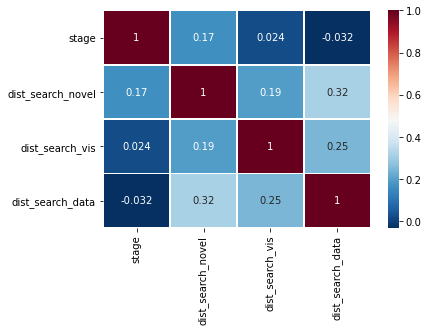

In [8]:
import seaborn as sb

sb.heatmap(spearmancorr, 
            xticklabels=spearmancorr.columns,
            yticklabels=spearmancorr.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.5)